# Tiny Data Science Project

My analytical questions to solve for this dataset are:
1)  Are there movies with a large discrepancies between critic and audience ratings?
2)  What are the particular genres that critics and audiences don't share similar views on?
3)  Is it effective to cluster similar movies based on various features?
4)  Do clusters formed based on various movie features result in accurate movie recommendations?

datasets taken from kaggle - 'https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset'

---------------------------------------------------------------------------------------------------------------------------------------------

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [543]:
#loading the first dataset 
movies=pd.read_csv('rotten_tomatoes_movies.csv')

## Exploratory Data Analysis (EDA)

### 1. Merging the datasets

In [544]:
movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [545]:
movies.shape

(17712, 22)

In [546]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [547]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [548]:
# loading the second dataset 
reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv', low_memory=False)
reviews.head()
# low_memory is set to false as the dataset was huge and the csv file was not able to load.

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,06-02-2010,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,06-02-2010,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,09-02-2010,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,09-02-2010,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,10-02-2010,What's really lacking in The Lightning Thief i...


In [549]:
reviews.shape

(1048575, 8)

In [550]:
reviews.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')

In [551]:
# Merging the two datasets using the common column "rotten_tomatoes_link
movie_reviews = pd.merge(movies, reviews, on='rotten_tomatoes_link', how='inner')

In [552]:
movie_reviews.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,06-02-2010,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Louise Keller,False,Urban Cinefile,Fresh,NaN,06-02-2010,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,NaN,False,FILMINK (Australia),Fresh,NaN,09-02-2010,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,09-02-2010,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,10-02-2010,What's really lacking in The Lightning Thief i...


In [553]:
movie_reviews.shape

(1048444, 29)

### 2. Cleaning the dataset

- Removing the duplicates

In [554]:
duplicated_rows = movie_reviews[movie_reviews.duplicated()]
count_duplicated=duplicated_rows.shape[0]
count_duplicated

119471

In [555]:
# droppping these duplicate rows from my dataset
movie_reviews.drop_duplicates(inplace=True)

In [556]:
movie_reviews.shape

(928973, 29)

before removing the duplicate columns, the merged dataframe was of the shape (1048444, 29), but after cleaning and removing the duplicate rows, the shape transformed to (928973, 29)

In [557]:
# looking at unique movie names as there can be sequels of movies present in our dataset
(movie_reviews['movie_title'].nunique())

15814

After the removal of exact duplicates, there are 928,973 rows in the dataset, but there are only 15,814 unique movie names. This suggests that a lot of movies have multiple entries or rows in our dataset. This could be due to different versions that is, the movies can be sequels, releases, or other factors that result in multiple records for a single movie.

In [558]:
# looking at unique movie links in the dataset
(movie_reviews['rotten_tomatoes_link'].nunique())

16386

The unique links in the dataset is 16375 that is more than the unique names and so there are chances that some of these movies might not be duplicates but their sequels which we don't want to remove as they can be important to our analysis and removing them could disrupt our analysis. 

In [559]:
# Checking for duplicate entries based on the 'movie_title' column
duplicate_titles = movie_reviews[movie_reviews.duplicated(subset=['movie_title'], keep=False)]

# Displaying the duplicate movie titles along with some other features for better identification of diplicates
duplicate_titles[['rotten_tomatoes_link','movie_title', 'runtime', 'audience_rating','tomatometer_rating',\
                  'review_content','content_rating']]

,rotten_tomatoes_link,movie_title,runtime,audience_rating,tomatometer_rating,review_content,content_rating
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,119.0,53.0,49.0,A fantasy adventure that fuses Greek mythology...,PG
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,119.0,53.0,49.0,"Uma Thurman as Medusa, the gorgon with a coiff...",PG
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,119.0,53.0,49.0,With a top-notch cast and dazzling special eff...,PG
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,119.0,53.0,49.0,Whether audiences will get behind The Lightnin...,PG
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,119.0,53.0,49.0,What's really lacking in The Lightning Thief i...,PG
...,...,...,...,...,...,...,...
1048439,m/tourist,The Tourist,99.0,42.0,20.0,"The Tourist is memorable for one thing, at lea...",PG-13
1048440,m/tourist,The Tourist,99.0,42.0,20.0,"It's formulaic, but all the elements are in th...",PG-13
1048441,m/tourist,The Tourist,99.0,42.0,20.0,Johnny Depp is such a talented chameleon that ...,PG-13
1048442,m/tourist,The Tourist,99.0,42.0,20.0,Jolie! Depp! Romantic locations! Intrigue! Som...,PG-13


As we can see, the duplicate rows have the same values for (important) features. While variations do exist in certain columns like 'review_content,' it is not crucial to our primary analysis focused on factors beyond sentiment. Upon closer examination, it's evident that some of these duplicates don't represent sequels but are repetitive entries of the same movies. To streamline our dataset, the only way to make sure that we dont get rid of the sequels is if we look at their runtimes. It is highly unlikely for a movie to be of exact length (in minutes) as their sequel and so removing the movies based on the movie_title as well as runtime seems the most sinsible choice.

In [560]:
# Removing duplicates based on 'movie_title' and 'runtime'.
movie_reviews.drop_duplicates(subset=['movie_title','runtime'], keep='first', inplace=True)

# Displaying the shape of the resulting DataFrame
movie_reviews.shape

(16375, 29)

In [561]:
# The rows are reduced from 928973 to 16375.

### 3. Handling the outliers

- looking at the distribution of 'tomatometer_rating' and 'audience_rating' to check if there are any outliers

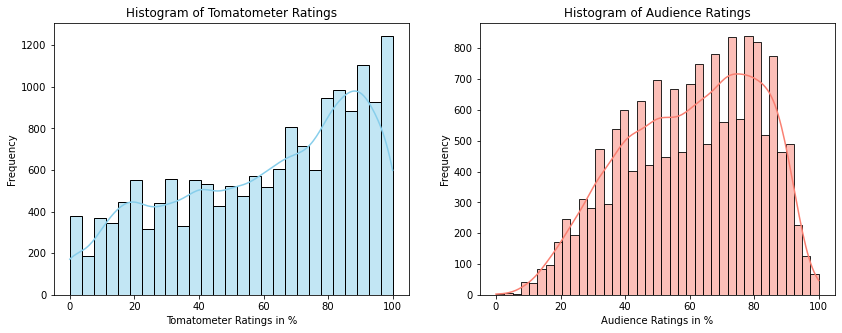

In [562]:
# Create a figure with two subplots (one for 'tomatometer_rating' and other for 'audience_rating')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting histograms for 'tomatometer_rating' and 'audience_rating' 
sns.histplot(movie_reviews['tomatometer_rating'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(movie_reviews['audience_rating'], kde=True, ax=axes[1], color='salmon')

axes[0].set_title('Histogram of Tomatometer Ratings')
axes[0].set_xlabel('Tomatometer Ratings in %')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Audience Ratings')
axes[1].set_xlabel('Audience Ratings in %')
axes[1].set_ylabel('Frequency')

plt.show()

the tomatometer ratings distribution is slightly right skewed. The presence of 0% Tomatometer ratings in the histogram reflects intentional expressions by critics, advising against watching certain movies. Acknowledging this unique feature as genuine, treating these ratings as outliers could compromise the analysis. Meanwhile, the audience_rating distribution displays a comparatively normal distribution without apparent outliers, indicating consistent ratings within the expected range.

In [563]:
#checking to see how many movies got 0 as their 'tomatometer_rating'
(movie_reviews['tomatometer_rating'] == 0).sum()

342

In [564]:
#checking to see how many movies got 0 as their 'audience_rating'
(movie_reviews['audience_rating'] == 0).sum()

4

In [565]:
# and the total number of movies
(movie_reviews['movie_title']).count()

16375

This means that a lot of movies are liked by the audience which are given a 0% rating by the critics. So we have a good amount of movies having large discrepancies between critic and audience ratings. (we will work on this later)

- checking if 'runtime' column has any outliers

In [566]:
movie_reviews.runtime.describe()

count    16090.000000
mean       102.185768
std         18.737112
min          5.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        266.000000
Name: runtime, dtype: float64

<AxesSubplot:>

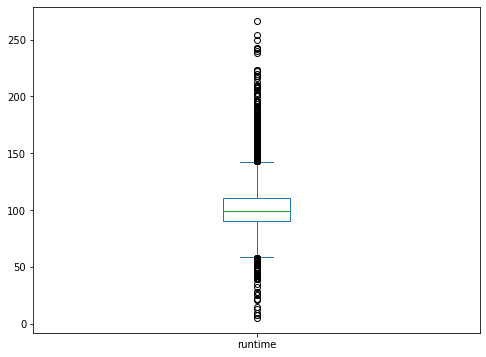

In [567]:
plt.subplots(figsize=(8, 6))
movie_reviews.runtime.plot.box()

As we can see there is a lot of variance from the interquartile range of the runtime column.
This means that the movies runtime is spread all across ranging from as low as 5 min to going to 266 min.
As we know, there are movies that are called short movies and also movies or documentaries that go on for hours, and so the information given to us in this dataset might be true and cannot be considered as outliers. 

### 4. Handling Missing data

In [568]:
movie_reviews.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           287
critics_consensus                   7992
content_rating                         0
genres                                18
directors                            179
authors                             1423
actors                               322
original_release_date               1074
streaming_release_date               347
runtime                              285
production_company                   461
tomatometer_status                    38
tomatometer_rating                    38
tomatometer_count                     38
audience_status                      410
audience_rating                      266
audience_count                       267
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
critic_name                         1071
top_critic                             0
publisher_name  

In [569]:
# the 'movie_info' column, 'critics_consensus' column and the 'review_content' column won't be of any use to me as 
# it leads to sentiment analysis which is not what my analysis is related to.
# Also, there are huge amount of missing values in 'directors', 'authors', 'actors' & 'production_company', which could've 
# been useful for our clustering but dealing with these missing values will affect the originality of the dataset and thus
# removing these columns seems as the most appropriate choice for dealing with them.

In [570]:
movie_reviews.drop(columns=['movie_info', 'critics_consensus', 'review_content','critic_name',\
                            'directors','authors','actors','production_company'], inplace=True)

In [571]:
movie_reviews.shape 

(16375, 21)

In [572]:
movie_reviews.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
content_rating                         0
genres                                18
original_release_date               1074
streaming_release_date               347
runtime                              285
tomatometer_status                    38
tomatometer_rating                    38
tomatometer_count                     38
audience_status                      410
audience_rating                      266
audience_count                       267
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
top_critic                             0
publisher_name                         0
review_type                            0
review_score                        5672
review_date                            0
dtype: int64

- Given the significance of the 'genre' information for the analysis and the relatively small number of missing values (18 out of 15814 rows), opting to remove rows with missing genre data is a sensible approach. This ensures minimal interference with the analysis while maintaining the integrity of the dataset.

In [573]:
# removing the rows having missing value in the genre section
movie_reviews.dropna(subset=['genres'], inplace=True)

- for "original_release_date" and "streaming_release_date" columns, as my analytical questions do not focus much on temporal analysis, I choose to fill the missing values with a date format that I know would not be matching any of the values present in my columns and so i know that those are the unknown dates

In [574]:
date_columns = ['original_release_date', 'streaming_release_date']
movie_reviews[date_columns] = movie_reviews[date_columns].fillna('1800-01-01')

- "runtime" is an important feature of my dataset and can be used to gain a lot of information by performing various correlation analysis techniques and getting to know more about how the length of the movies affects the movie reviews of the audience as well as the critics.

In [575]:
movie_reviews.runtime.describe()

count    16072.000000
mean       102.191078
std         18.735524
min          5.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        266.000000
Name: runtime, dtype: float64

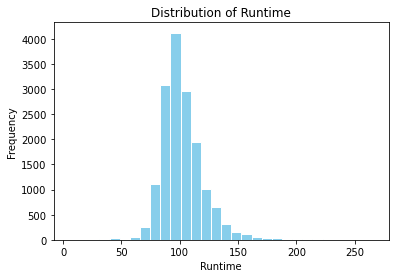

In [576]:
#Plotting histogram of 'runtime' to see distribution of the values in this column
plt.hist(movie_reviews['runtime'], bins=30, color='skyblue', edgecolor='w')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

The distribution of runtime values is almost normal and hence filling the missing values in this column with the mean value seems like a sensible choice. This is because, when looking at the description of the runtime column, we can see the mean is 102.19 while the median is 99 with no significant outliers, this suggests that the distribution is relatively symmetric. Filling the missing values with the mean helps maintain the integrity of the overall distribution and provides a complete picture of the central tendency.

In [577]:
mean_runtime = movie_reviews['runtime'].mean()
movie_reviews['runtime'].fillna(mean_runtime, inplace=True)

In [578]:
#this shows us that the distrinution of my column remained the almost the same even after filling the missing values.
movie_reviews.runtime.describe()

count    16357.000000
mean       102.191078
std         18.571575
min          5.000000
25%         90.000000
50%         99.000000
75%        110.000000
max        266.000000
Name: runtime, dtype: float64

- for further analysis, we can bucketize and categorize to form a new column named 'runtime_bucketized' containing values as follows : short, very short, medium, long and very long.

In [579]:
# defining the bin edges and labels for each category
# assigning 0-50 min to very short movies, 51-90 as short and so on.
bin_edges = [0, 50, 90, 120, 150, float('inf')]
bin_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# creating a new column 'runtime_bucketized' based on the bins and labels
movie_reviews['runtime_bucketized'] = pd.cut(movie_reviews['runtime'], bins=bin_edges,\ 
                                             labels=bin_labels, include_lowest=True)

# Displaying the result
movie_reviews[['runtime', 'runtime_bucketized']].head()

,runtime,runtime_bucketized
0,119.0,Medium
149,90.0,Short
291,122.0,Long
315,95.0,Medium
369,127.0,Long


In [580]:
# to check if 'runtime_bucketized' column is added in our dataset
movie_reviews.columns 

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'runtime_bucketized'],
      dtype='object')

In [581]:
movie_reviews.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
content_rating                         0
genres                                 0
original_release_date                  0
streaming_release_date                 0
runtime                                0
tomatometer_status                    38
tomatometer_rating                    38
tomatometer_count                     38
audience_status                      410
audience_rating                      266
audience_count                       267
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
top_critic                             0
publisher_name                         0
review_type                            0
review_score                        5662
review_date                            0
runtime_bucketized                     0
dtype: int64

In [582]:
#to check whether the missing values in the columns 'tomatometer_status', 'tomatometer_rating', and 'tomatometer_count' 
# occur in the same rows, i will create a new dataframe containing the missing values in these columns
missing_values_df = movie_reviews[movie_reviews['tomatometer_status'].isnull() | 
                               movie_reviews['tomatometer_rating'].isnull() | 
                               movie_reviews['tomatometer_count'].isnull() ]
print(missing_values_df[['tomatometer_status', 'tomatometer_rating', 'tomatometer_count']].head())

       tomatometer_status  tomatometer_rating  tomatometer_count
26908                 NaN                 NaN                NaN
69664                 NaN                 NaN                NaN
86334                 NaN                 NaN                NaN
112155                NaN                 NaN                NaN
127126                NaN                 NaN                NaN


Removing these columns as 'tomatometer_status', 'tomatometer_rating', and 'tomatometer_count' contain critical 
information for the analysis. If these values are missing, it could significantly impact the reliability and interpretability of the results. Also, imputing critical metrics related to ratings and counts of the critics may distort the true characteristics of the data.

In [583]:
# removing the missing values from all three columns.
movie_reviews.dropna(subset=['tomatometer_status', 'tomatometer_rating', 'tomatometer_count'], inplace=True)

As for the 'audience_rating', 'audience_count' and 'audience_status', the number of missing values is high and removing them may lead to substantial reduction in the dataset size. From the histograms above, the distribution of audience_rating seems to be normal while that of the tomatometer_rating seems more complicated and complex to fill. Hence, unlike tomatometer-related metrics, audience-related metrics might be more easier to impute as the missing values are not extensive.

In [584]:
# Looking at the distribution of the audience rating column so as to make a proper decision to deal with the missing values
movie_reviews['audience_rating'].describe()

count    16084.000000
mean        60.503855
std         20.582506
min          0.000000
25%         45.000000
50%         62.000000
75%         78.000000
max        100.000000
Name: audience_rating, dtype: float64

In [585]:
# Since the distribution is somewhat skewed (median is slightly higher than the mean), imputing missing values with the
# median is good and sensible option to preserve the central tendency.
movie_reviews['audience_rating'].fillna(movie_reviews['audience_rating'].median(), inplace=True)

In [586]:
# For the audience_status, the missing values will be filled with mode while for audience_count, the missing
# values will be filled with median
# Imputing missing values
movie_reviews['audience_count'].fillna(movie_reviews['audience_count'].median(), inplace=True)
movie_reviews['audience_status'].fillna(movie_reviews['audience_status'].mode()[0], inplace=True)

- "review_score" column could've been of a lot of importance for my analysis, but as it has a huge number of missing values (5662), working with it might risk the quality of results for my analysis and hence removing the entire row from the dataset seems to be the right way to deal with them.

In [587]:
# removing the 'review_score' column from my dataset
movie_reviews.drop('review_score', axis=1, inplace=True)

In [588]:
movie_reviews.isna().sum()
# all missing values are dealt with

rotten_tomatoes_link                0
movie_title                         0
content_rating                      0
genres                              0
original_release_date               0
streaming_release_date              0
runtime                             0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
top_critic                          0
publisher_name                      0
review_type                         0
review_date                         0
runtime_bucketized                  0
dtype: int64

**Feature engineering**
- For my analysis purposes, I want to create a new column showing the difference between the critic's ratings and the audience ratings

In [589]:
#creating a new column showing the difference between 'tomatometer_rating' and 'audience_rating'
#create a new column 'rating_discrepancy'
movie_reviews['rating_discrepancy'] = movie_reviews['tomatometer_rating'] - movie_reviews['audience_rating']
movie_reviews[['tomatometer_rating', 'audience_rating', 'rating_discrepancy']].head()

,tomatometer_rating,audience_rating,rating_discrepancy
0,49.0,53.0,-4.0
149,87.0,64.0,23.0
291,67.0,53.0,14.0
315,100.0,97.0,3.0
369,89.0,74.0,15.0


- *Note - the negative sign shows that the audience liked the movie more than the critics*

In [590]:
print(movie_reviews['rating_discrepancy'].describe())

count    16319.000000
mean         0.298548
std         21.724356
min        -95.000000
25%        -13.000000
50%          3.000000
75%         15.000000
max         86.000000
Name: rating_discrepancy, dtype: float64


The above table gives us a statistical overview of the rating discrepancies between Tomatometer and audience ratings.
The mean is 0.29 which signifies that, on average, audience_rating are slightly lower than the tomatometer_rating.
The most important feature in this table is the standard deviation which is 21.7 which means that, on average, the differences between tomatometer ratings and audience ratings are about 21.7 units away from the mean. Some movies have large differences (positive or negative) between tomatometer and audience ratings, contributing to the higher standard deviation.

In [591]:
# Create a new column 'absolute_rating_discrepancy'
movie_reviews['absolute_rating_discrepancy'] = movie_reviews['rating_discrepancy'].abs()

In [592]:
movie_reviews.columns

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_date', 'runtime_bucketized',
       'rating_discrepancy', 'absolute_rating_discrepancy'],
      dtype='object')

In [593]:
movie_reviews.shape

(16319, 23)

- seeing the details of important columns for my analysis

In [594]:
columns_of_interest = ['tomatometer_rating', 'audience_rating', 'rating_discrepancy', 'runtime']
movie_reviews[columns_of_interest].describe()

,tomatometer_rating,audience_rating,rating_discrepancy,runtime
count,16319.000000,16319.000000,16319.000000,16319.000000
mean,60.823948,60.525400,0.298548,102.199123
std,28.490855,20.434539,21.724356,18.575374
min,0.000000,0.000000,-95.000000,5.000000
25%,38.000000,45.000000,-13.000000,90.000000
50%,67.000000,62.000000,3.000000,99.000000
75%,86.000000,77.000000,15.000000,110.000000
max,100.000000,100.000000,86.000000,266.000000


### 5. Visualizing the distribution of different columns

- visualizing my categorical columns 

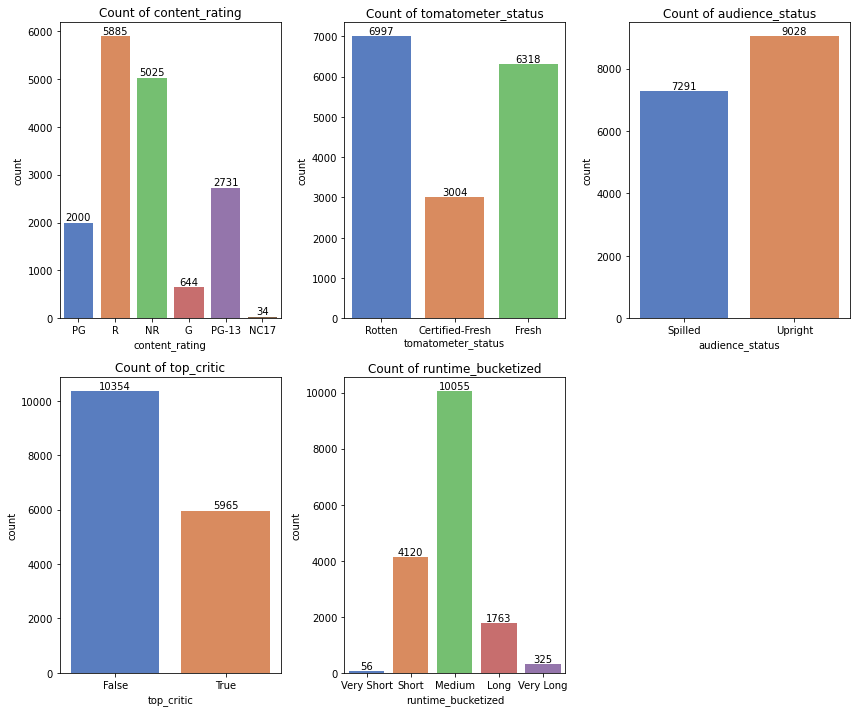

In [595]:
#for categorical columns in my dataset, i want to visualize the distribution of each one of them using the histograms 
categorical_columns = ['content_rating', 'tomatometer_status', 'audience_status', 'top_critic', 'runtime_bucketized']

# Setting the number of plots per row
plots_per_row = 3
# Calculating the number of rows needed
num_rows = (len(categorical_columns) + plots_per_row - 1) // plots_per_row

# Creating subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(12, 5 * num_rows), constrained_layout=True)
# Flatten the 2D array of subplots to simplify indexing
axs = axs.flatten()

for i, column in enumerate(categorical_columns):
    # Select the current subplot
    ax = axs[i]
    # Countplot
    sns.countplot(x=column, data=movie_reviews, palette='muted', ax=ax)
    ax.set_title(f'Count of {column}')
    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.0, p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Remove empty plots in the last row
for i in range(len(categorical_columns), num_rows * plots_per_row):
    fig.delaxes(axs[i])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

The above countplots show the distributions of each categorical columns in my dataset. The plots show clear distribution of the categories in these columns. We can see that most of the critics that reviewed the movie were not considered as the 'top_critic'. This might mean that 'tomatometer_ratings' are not as authentic as we think they are. Also, the runtime of most movies come under the medium category i.e most of the movies ranges from 90 min to 120 min.

- visualizing my temporal columns

In [596]:
# for my temporal columns i.e 'original_release_date', 'streaming_release_date' and 'review_date', I want to 
# create time-series plot to visualize the distribution of these columns

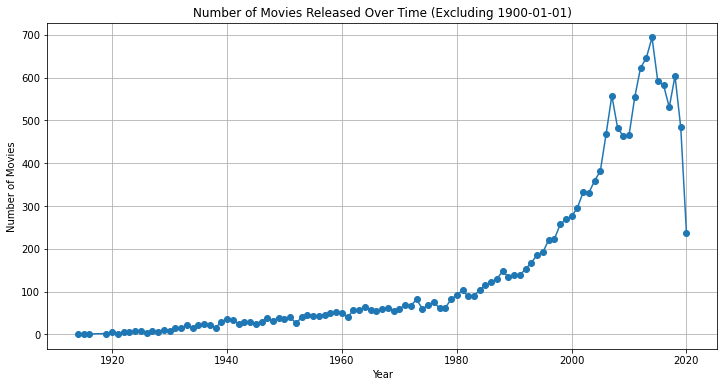

In [690]:
#for 'original_release_date'
#converting the 'original_release_date' column to datetime
movie_reviews['original_release_date'] = pd.to_datetime(movie_reviews['original_release_date'])

# Filter movies not released on 1800-01-01 (as this is what we used to fill in the missing values)
movie_reviews_filtered = movie_reviews[movie_reviews['original_release_date'] != '1800-01-01']

# Creating a time series plot for the count of movies released over time after filtering
plt.figure(figsize=(12, 6))
movie_reviews_filtered.groupby(movie_reviews_filtered['original_release_date'].dt.year)['movie_title']\
.count().plot(marker='o')
plt.title('Number of Movies Released Over Time (Excluding 1900-01-01)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

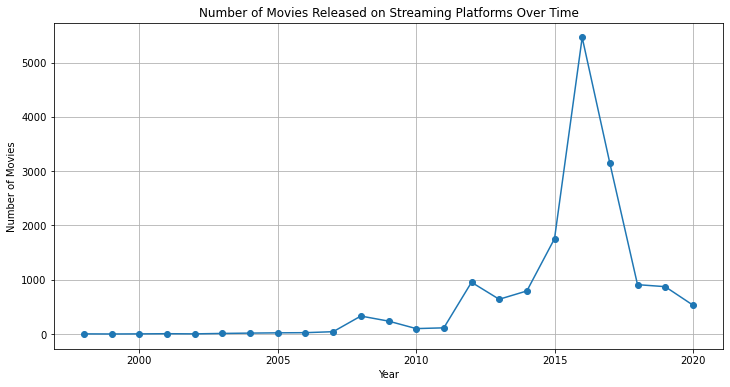

In [691]:
# Convert the 'streaming_release_date' column to datetime
movie_reviews['streaming_release_date'] = pd.to_datetime(movie_reviews['streaming_release_date'])

# Filter movies not released on streaming platforms on 1800-01-01 (as this is what we used to fill in the missing values)
movie_reviews_filtered = movie_reviews[movie_reviews['streaming_release_date'] != '1800-01-01']

# Create a time series plot for the count of movies released on streaming platforms over time
plt.figure(figsize=(12, 6))
movie_reviews_filtered.groupby(movie_reviews_filtered['streaming_release_date'].dt.year)['movie_title']\
.count().plot(marker='o')
plt.title('Number of Movies Released on Streaming Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

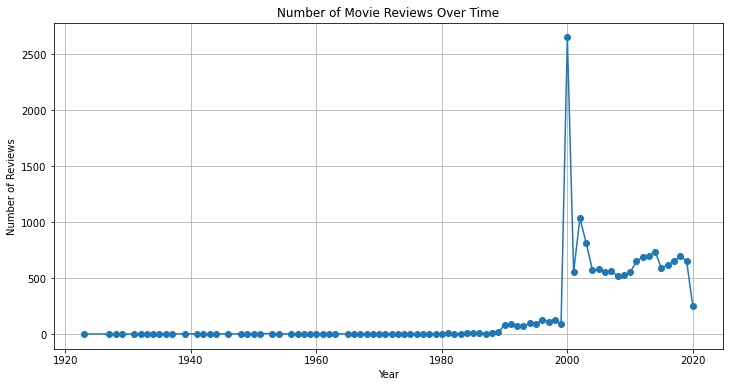

In [599]:
import warnings
warnings.filterwarnings("ignore")
# Convert the 'review_date' column to datetime
movie_reviews['review_date'] = pd.to_datetime(movie_reviews['review_date'])

# Filter movies not reviewed on 1900-01-01 (as this is what we used to fill in the missing values)
movie_reviews_filtered = movie_reviews[movie_reviews['review_date'] != '1800-01-01']

# Create a time series plot for the count of movie reviews over time
plt.figure(figsize=(12, 6))
movie_reviews_filtered.groupby(movie_reviews_filtered['review_date'].dt.year)['movie_title'].count().plot(marker='o')
plt.title('Number of Movie Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

Although my analytical questions do not concern temporal analysis, having an overall view of how and when the 
movies were reviewed and released and how many critics or audiences gave the movie reviews is important.
In all three charts, we have removed the exact date of '1800-01-01' as it is the value i used to fill in the missing values for these columns. So ignoring the frequency of the date '1800-01-01', we do our analysis. Although there are a lot of movies released between the years 1920 to 2020, most of movies in our dataset are released between 2000 to 2018. Most number of reviews are given in the year 2000 itself and then suddenly dropping after the year 2000.

- visualizing the distribution of my numerical columns
    

We have already visualized the distribution of 'tomatometer_rating' and 'audience_rating' above when dealing with the outliers. We have seen the distribution of the 'runtime' column as well.

- to analyse the relationship between the columns more efficiently

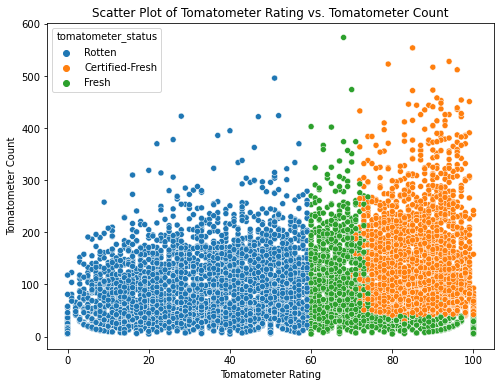

In [605]:
#correlation between the 'tomatometer_rating', 'tomatometer_count' & 'tomatometer_status'.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tomatometer_rating', y='tomatometer_count', hue='tomatometer_status', data=movie_reviews)
plt.title('Scatter Plot of Tomatometer Rating vs. Tomatometer Count')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Tomatometer Count')
plt.show()

This scatterplot clearly depicts the boundary between what is considered 'Rotten', 'Fresh' and 'Certified_fresh' i.e any movies having tomatometer_rating of 60% and lower are considered 'Rotten', movies above 60% are considered 'Fresh' and the movies having 75% or above ratings are considered 'Certified Fresh'.
There are some movies having ratings in the range of 75% to 100% marked as  'Fresh' but that is because the eligibility criteria for movies to be marked as certified fresh (which are that the ratings should maintain the 75% above status for a long time and that 5 top critics should give this rating to the movie for it to be considered 'Certified Fresh') must have not have met.

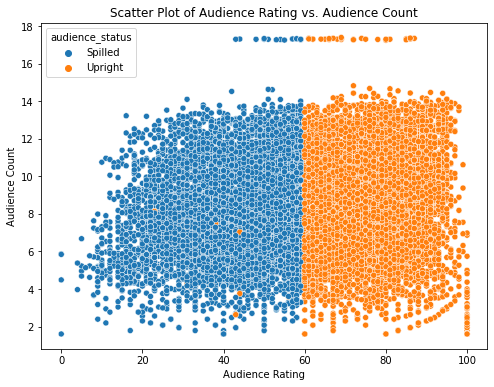

In [606]:
# correlation between the 'audience_rating', 'audince_count' & 'audience_status'.

# log must be taken of the 'audience_count' column because, there are extreme values as well as a large range of values.
# Taking the logarithm can be useful as I have a few movies with very high audience_counts, and most movies have 
# relatively low audience_counts.This transformation can help in visualizing the distribution more clearly.

# Taking the log of 'audience_count' and creating visual
movie_reviews['log_audience_count'] = np.log(movie_reviews['audience_count'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='audience_rating', y='log_audience_count', hue='audience_status', data=movie_reviews)
plt.title('Scatter Plot of Audience Rating vs. Audience Count')
plt.xlabel('Audience Rating')
plt.ylabel('Audience Count')
plt.show()

The above scatterplot shows how the audience ratings that are below 60% are given a negative review that is 'spilled' while the movies rated above 60% are given a status of 'upright' by the audiences. We can see that there are a very few movies that are given the upright status even though they lie below the threshold mark. This may be because of factors beyond the numerical rating, such as additional qualitative assessments, critical acclaim etc that might contribute to the 'upright' status.

- view the correlation between the important numerical columns via a heatmap

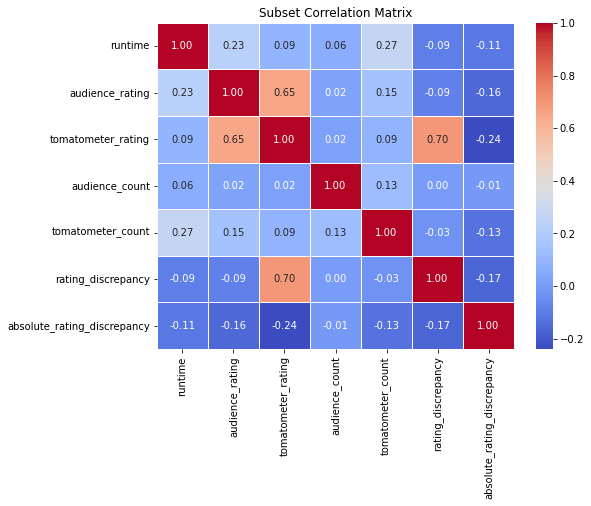

In [612]:
# Calculating the correlation matrix
# Selecting the subset of columns for the heatmap
subset_columns = ["runtime", "audience_rating", "tomatometer_rating", "audience_count", "tomatometer_count",\
                  "rating_discrepancy", "absolute_rating_discrepancy"]

# Calculating the correlation matrix for the subset of columns
subset_correlation_matrix = movie_reviews[subset_columns].corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Subset Correlation Matrix')
plt.show()

<AxesSubplot:>

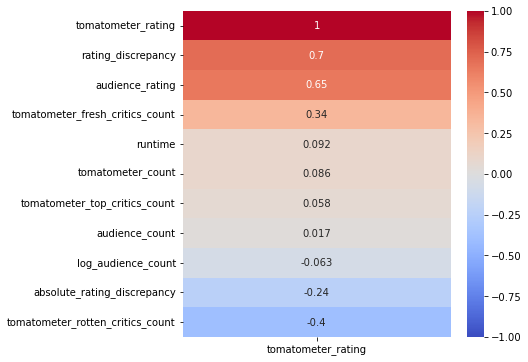

In [615]:
# Plotting the heatmap to check the correlation between the 'tomatometer_rating' i.e the critic's rating & other features
plt.figure(figsize=(6, 6))
sns.heatmap(movie_reviews.corr()[['tomatometer_rating']]\
            .sort_values(by='tomatometer_rating',ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

<AxesSubplot:>

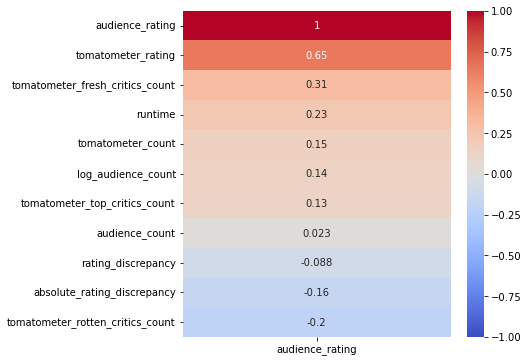

In [617]:
# Plotting the heatmap to check the correlation between the 'audience_rating' & other features
plt.figure(figsize=(6, 6))
sns.heatmap(movie_reviews.corr()[['audience_rating']]\
            .sort_values(by='audience_rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

The positive correlation between the "rating_discrepancy" column and "tomatometer_rating" suggests that as tomatometer ratings increase, the rating discrepancy tends to grow. This can be attributed to the calculation method of the rating discrepancy, which is based on the difference between tomatometer and audience ratings. This means that the 'audience_rating' depends more on the runtime of a movie than the 'tomatometer_rating'.
'tomatometer_rating' & 'audience_rating' are correlated with each other strongly.

- exploring the relation between 'tomatometer_rating' & 'audience_rating' some more

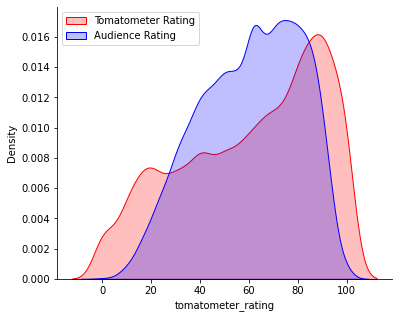

In [622]:
# code help taken from 'https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts'
#creating density plot showing the distributions of 'tomatometer_rating' and 'audience_rating'
f, ax = plt.subplots(figsize=(6, 5))
sns.despine(f)
sns.kdeplot(movie_reviews['tomatometer_rating'], shade=True, color='r', label='Tomatometer Rating')
sns.kdeplot(movie_reviews['audience_rating'], shade=True, color='b', label='Audience Rating')
plt.legend(loc='upper left')
plt.show()

They both are right skewed and correlate with each other more or less. 
From this plot, along with the correlation plot, we know that the opinions of critics and that of the audience on the movies match to some extent.

- Basic scatterplot between 'tomatometer_rating' and 'audience_rating'

<AxesSubplot:xlabel='tomatometer_rating', ylabel='audience_rating'>

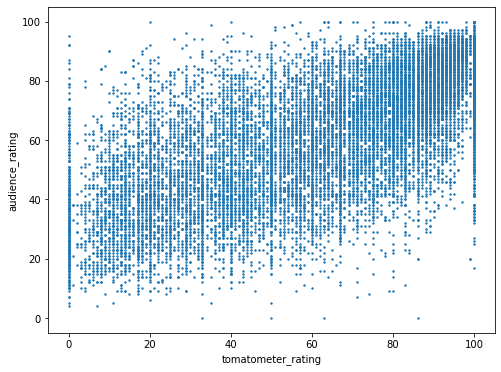

In [621]:
# code help taken from 'https://www.kaggle.com/code/milofd/rottentomatoes-critics-vs-audiences-reviews'
movie_reviews.plot.scatter(x="tomatometer_rating", y="audience_rating",figsize=(8,6), s=2)

From the above scatterplot, we can see that there are some movies who have very low tomatometer_rating but have high audience_rating. Similarly, some movies have tomatometer_rating as 100% but still have very low audience rating. So, even though 'tomatometer_rating' and 'audience_rating' have a correlation value of 0.65, there are some movies that have certain discrepancies between adience reviews and critic reviews.

**answer 1) - There are movies present with a large discrepancies between critic and audience rating**

- Forming a histogram to see the distribution of movies based on rating discrepancy

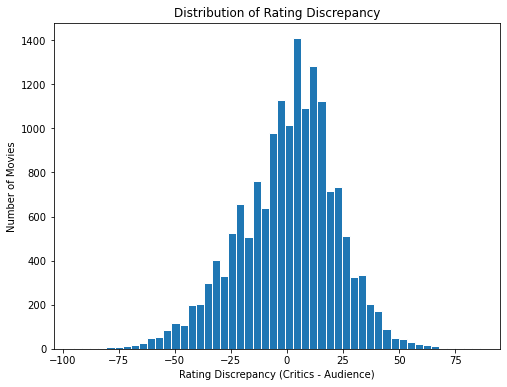

In [624]:
plt.figure(figsize=(8, 6))
plt.hist(movie_reviews['rating_discrepancy'], bins=50, edgecolor='w')
plt.title('Distribution of Rating Discrepancy')
plt.xlabel('Rating Discrepancy (Critics - Audience)')
plt.ylabel('Number of Movies')
plt.show()

This histogram shows that the distribution of the movies on the basis of rating_discrepancy is almost normal i.e a lot of movies have their difference for tomatometer_rating and audience_rating close to zero and only a few movies have their rating discrepancy as larger numbers.
The goal is to figure out the genres of these movies that show huge discrepancy and thus figure out what genres are liked by audience and hated by the critics and vice versa.

--------------------------------------------------------------------------------------------------------------------------------------------------

### Q2. What are the particular genres that critics and audiences don't share similar views on?

In [625]:
# Movies where critics loved but the audience didn't
critics_loved_movies = movie_reviews.nlargest(10, 'rating_discrepancy')

In [626]:
# Movies where the audience loved but critics didn't
audience_loved_movies = movie_reviews.nsmallest(10, 'rating_discrepancy')

In [631]:
# Creating DataFrames for movies loved by critics and audience
critics_loved = critics_loved_movies[['movie_title', 'runtime','genres', 'tomatometer_rating', \
                                      'audience_rating', 'rating_discrepancy','absolute_rating_discrepancy']]
audience_loved = audience_loved_movies[['movie_title', 'runtime','genres', 'tomatometer_rating', \
                                        'audience_rating', 'rating_discrepancy','absolute_rating_discrepancy']]

In [689]:
print("Critics Loved, Audience Didn't:")
critics_loved

Critics Loved, Audience Didn't:


,movie_title,runtime,genres,tomatometer_rating,audience_rating,rating_discrepancy,absolute_rating_discrepancy
635294,Outside the Law,90.000000,"Action & Adventure, Television",86.0,0.0,86.0,86.0
326310,Everybody Knows... Elizabeth Murray,60.000000,Documentary,100.0,17.0,83.0,83.0
497258,Knock Down the House,86.000000,Documentary,99.0,20.0,79.0,79.0
607593,Never Rarely Sometimes Always,101.000000,Drama,99.0,20.0,79.0,79.0
400370,Hannah Gadsby: Nanette,102.191078,Comedy,100.0,25.0,75.0,75.0
145694,Artik,78.000000,Horror,100.0,26.0,74.0,74.0
516738,Leslie Jones: Time Machine,102.191078,Comedy,100.0,27.0,73.0,73.0
63565,Angel Rodriguez,86.000000,"Art House & International, Drama, Television",83.0,11.0,72.0,72.0
944336,The Demolisher,85.000000,"Action & Adventure, Art House & International,...",80.0,9.0,71.0,71.0
132298,Amy Schumer Growing,60.000000,Comedy,79.0,9.0,70.0,70.0


In [633]:
print("\nAudience Loved, Critics Didn't:")
audience_loved


Audience Loved, Critics Didn't:


,movie_title,runtime,genres,tomatometer_rating,audience_rating,rating_discrepancy,absolute_rating_discrepancy
95288,96 Souls,112.0,"Drama, Science Fiction & Fantasy",0.0,95.0,-95.0,95.0
406782,Hating Breitbart,85.0,"Documentary, Special Interest",0.0,92.0,-92.0,92.0
462185,Is That a Gun in Your Pocket?,97.0,Comedy,0.0,92.0,-92.0,92.0
923735,The After Party,120.0,"Comedy, Musical & Performing Arts",0.0,87.0,-87.0,87.0
78645,Home,90.0,"Documentary, Drama, Kids & Family",0.0,86.0,-86.0,86.0
38785,Fall,92.0,"Comedy, Drama, Romance",0.0,84.0,-84.0,84.0
996894,The Music of Silence,130.0,Drama,0.0,81.0,-81.0,81.0
26837,Sparkle,100.0,"Drama, Musical & Performing Arts",10.0,90.0,-80.0,80.0
121688,All Relative,85.0,"Comedy, Drama, Romance",10.0,90.0,-80.0,80.0
601763,Mysteries Of The Jesus Prayer,114.0,"Documentary, Drama",20.0,100.0,-80.0,80.0


Both the tables show mixed genres and hence it is not evident what genres show the most discrepancies between audience and critics

- Calculating the mean audience_rating and tomatometer_rating for each genre i.e each row consists of one genre and their corresponding means

In [634]:
# Splitting the 'genres' column into a list of genres
genres_list = movie_reviews['genres'].str.split(', ')

In [635]:
# Creating a new DataFrame with one row for each genre
genre_df = pd.DataFrame(genres_list.tolist(), index=movie_reviews.index).stack().\
reset_index(level=1, drop=True).to_frame('genre')

In [636]:
# joining the new genre df with the original df
movie_reviews_genre = pd.concat([movie_reviews, genre_df], axis=1)

In [637]:
# Grouping data by genre and calculate mean ratings and their mean discrepancies
genre_mean_ratings = movie_reviews_genre.groupby('genre').agg({
    'audience_rating': 'mean',
    'tomatometer_rating': 'mean',
    'rating_discrepancy':'mean'
}).reset_index()

In [638]:
# Sorting genres based on rating discrepancy in descending order
sorted_genres = genre_mean_ratings.sort_values(by='rating_discrepancy', ascending=False)

# Display the results
sorted_genres

,genre,audience_rating,tomatometer_rating,rating_discrepancy
7,Documentary,72.732909,80.900371,8.167462
4,Classics,71.030769,78.562179,7.531410
19,Television,66.696000,72.928000,6.232000
17,Special Interest,71.829464,77.384821,5.555357
11,Horror,46.419799,51.559555,5.139756
3,Art House & International,66.419201,70.817116,4.397915
6,Cult Movies,55.451613,59.419355,3.967742
20,Western,64.802158,68.460432,3.658273
14,Mystery & Suspense,54.066667,55.340944,1.274277
13,Musical & Performing Arts,70.715197,71.094580,0.379384


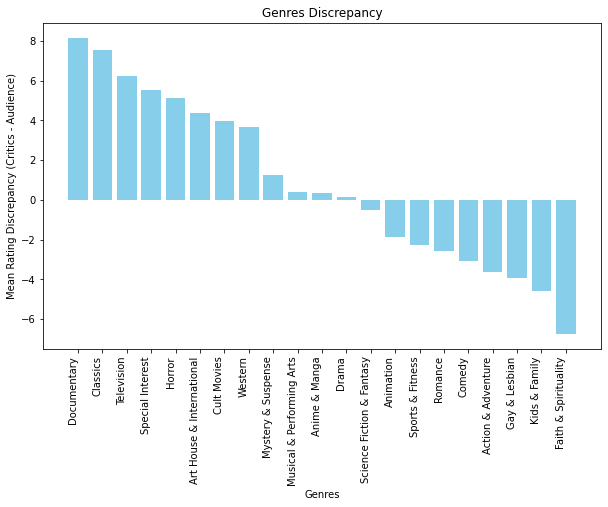

In [687]:
# Plotting the results to get a much more clearer understanding
plt.figure(figsize=(10, 6))
plt.bar(sorted_genres['genre'], sorted_genres['rating_discrepancy'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Mean Rating Discrepancy (Critics - Audience)')
plt.title('Genres Discrepancy')
plt.xticks(rotation=90, ha='right')
plt.show()

The 'rating_discrepancy' above represents the difference between the mean 'tomatometer_rating' and the mean 'audience_rating' for each genre. If the 'rating_discrepancy' is positive, it means that, on average, critics (tomatometer) rated the movies in that genre higher than the audience did. Conversely, if the 'rating_discrepancy' is negative, it indicates that, on average, the audience rated movies higher than the critics. i.e 
- Mean positive 'rating_discrepancy': Critics liked the genre more than the audience.
- Mean negative 'rating_discrepancy': Audience liked the genre more than the critics.

- **Answer 2)** - So, to answer my second analytical question of **"What are the particular genres that critics and audiences don't share similar views on?"** , 
the genres that, on average, the critics loved while the audience didn't really like much are **'Documentary'** followed by **'Classics'** while the genres that, on average, the audience loved way more than the critics are **'Faith & Spirituality'** followed by **'Kids & Family'**

The genres which, on average, **"the critics and audience have almost similar views"** include **'Drama'**, **'Musical & Performing Arts'** and **'Science Fiction & Fantasy '** .

-----------------------------------------------------------------------------------------------------------------------------------------------

### Q3. Movie Clustering

### 1. Label Encoding

- For genre column, label encoding is needed, but first, we need to separate the genres as each row has multiple genres assigned to a single movie.

In [640]:
movie_reviews.shape

(16319, 24)

In [641]:
# Split the 'genres' column into multiple binary columns using one-hot encoding
encoded_genres = movie_reviews['genres'].str.strip().str.get_dummies(sep=', ')

# Concatenate the new binary columns with the original dataset
movie_reviews_encoded = pd.concat([movie_reviews, encoded_genres], axis=1)
# Not removing the original genre column from the dataframe as it will come
# in use for solving the question of what genres show most discrepancy

# printing the new datafreame with all the genres with one-hot encoded genres
movie_reviews_encoded.head()

,rotten_tomatoes_link,movie_title,content_rating,genres,original_release_date,streaming_release_date,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,2015-11-25,119.0,Rotten,49.0,149.0,...,0,0,0,0,0,1,0,0,0,0
149,m/0878835,Please Give,R,Comedy,2010-04-30,2012-09-04,90.0,Certified-Fresh,87.0,142.0,...,0,0,0,0,0,0,0,0,0,0
291,m/10,10,R,"Comedy, Romance",1979-10-05,2014-07-24,122.0,Fresh,67.0,24.0,...,0,0,0,0,1,0,0,0,0,0
315,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,2017-01-13,95.0,Certified-Fresh,100.0,54.0,...,0,0,0,0,0,0,0,0,0,0
369,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,2016-06-10,127.0,Fresh,89.0,27.0,...,0,1,0,0,0,0,0,0,0,0


In [642]:
movie_reviews_encoded.shape

(16319, 45)

In [643]:
movie_reviews_encoded.columns

Index(['rotten_tomatoes_link', 'movie_title', 'content_rating', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_date', 'runtime_bucketized',
       'rating_discrepancy', 'absolute_rating_discrepancy',
       'log_audience_count', 'Action & Adventure', 'Animation',
       'Anime & Manga', 'Art House & International', 'Classics', 'Comedy',
       'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality',
       'Gay & Lesbian', 'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western'],
      dtype='object')

We can see that the number of columns in my dataset increased from 24 to 45 after one-hot encoding for the 'genres' column. This means that there are 21 unique genres present in my dataset.This makes my dataset sparsed but it also makes the working on genres column much more efficient.

In [644]:
#checking if the one-hot label encoding worked efficiently, that is, all the genres assigned to a single movie got encoded.
# Extracting the one-hot encoded genre columns for the first row
genres_columns = movie_reviews_encoded.iloc[0][['Action & Adventure', 'Animation', 'Anime & Manga',
       'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
       'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
       'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western']]
print('Genres assigned to the first movie in my dataset:')
print(movie_reviews['genres'].iloc[0])

# Displaying the result
print(genres_columns)

Genres assigned to the first movie in my dataset:
Action & Adventure, Comedy, Drama, Science Fiction & Fantasy
Action & Adventure           1
Animation                    0
Anime & Manga                0
Art House & International    0
Classics                     0
Comedy                       1
Cult Movies                  0
Documentary                  0
Drama                        1
Faith & Spirituality         0
Gay & Lesbian                0
Horror                       0
Kids & Family                0
Musical & Performing Arts    0
Mystery & Suspense           0
Romance                      0
Science Fiction & Fantasy    1
Special Interest             0
Sports & Fitness             0
Television                   0
Western                      0
Name: 0, dtype: object


from this, we can see that for the first row having 4 different genres assigned to a single movie, we get these 4 genres encoded for the particular movie. By doing this, we can work with the genres column with a lot more efficiency.

- For 'content_rating' column, the best way to encode is one-hot encoding as content_rating column has values (G, PG, PG-13, R, NR, and NC-17) which do not have a clear ordinal relationship. They represent discrete categories without a specific order. 

In [645]:
# Performing one-hot encoding on 'content_rating' column
movie_reviews_encoded = pd.get_dummies(movie_reviews_encoded, columns=['content_rating'], prefix='Rated', drop_first=True)

# Display the updated DataFrame
movie_reviews_encoded.head()

,rotten_tomatoes_link,movie_title,genres,original_release_date,streaming_release_date,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,Rated_NC17,Rated_NR,Rated_PG,Rated_PG-13,Rated_R
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,2015-11-25,119.0,Rotten,49.0,149.0,Spilled,...,1,0,0,0,0,0,0,1,0,0
149,m/0878835,Please Give,Comedy,2010-04-30,2012-09-04,90.0,Certified-Fresh,87.0,142.0,Upright,...,0,0,0,0,0,0,0,0,0,1
291,m/10,10,"Comedy, Romance",1979-10-05,2014-07-24,122.0,Fresh,67.0,24.0,Spilled,...,0,0,0,0,0,0,0,0,0,1
315,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"Classics, Drama",1957-04-13,2017-01-13,95.0,Certified-Fresh,100.0,54.0,Upright,...,0,0,0,0,0,0,1,0,0,0
369,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","Action & Adventure, Drama, Kids & Family",1954-01-01,2016-06-10,127.0,Fresh,89.0,27.0,Upright,...,0,0,0,0,0,0,0,0,0,0


In [647]:
movie_reviews_encoded.columns

Index(['rotten_tomatoes_link', 'movie_title', 'genres',
       'original_release_date', 'streaming_release_date', 'runtime',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'top_critic', 'publisher_name',
       'review_type', 'review_date', 'runtime_bucketized',
       'rating_discrepancy', 'absolute_rating_discrepancy',
       'log_audience_count', 'Action & Adventure', 'Animation',
       'Anime & Manga', 'Art House & International', 'Classics', 'Comedy',
       'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality',
       'Gay & Lesbian', 'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western',
       'Rated_NC17', 'Rated_NR', 'Rated_P

In [648]:
movie_reviews_encoded.shape

(16319, 49)

- for tomatometer_status and audience_status, ordinal encoding is preferred. For tomatometer_status, we have values rotten, fresh, and certified fresh which can be given an order of 0, 1 and 2 respectively while for audience_status, we have values of spilled and upright which can be assigned the values of 0 and 1.

In [649]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for 'tomatometer_status' and 'audience_status'
tomatometer_order = ['Rotten', 'Fresh', 'Certified-Fresh']
audience_order = ['Spilled', 'Upright']

# Create a custom mapping
tomatometer_mapping = {category: index for index, category in enumerate(tomatometer_order)}
audience_mapping = {category: index for index, category in enumerate(audience_order)}

# Apply ordinal encoding with custom mapping
movie_reviews_encoded['tomatometer_status'] = movie_reviews_encoded['tomatometer_status'].map(tomatometer_mapping)
movie_reviews_encoded['audience_status'] = movie_reviews_encoded['audience_status'].map(audience_mapping)

#checking if ordinal encoding worked accordingly
print("Unique values before encoding:")
print(movie_reviews['tomatometer_status'].unique())
print(movie_reviews['audience_status'].unique())

print("\nUnique values after encoding:")
print(movie_reviews_encoded['tomatometer_status'].unique())
print(movie_reviews_encoded['audience_status'].unique())

Unique values before encoding:
['Rotten' 'Certified-Fresh' 'Fresh']
['Spilled' 'Upright']

Unique values after encoding:
[0 2 1]
[0 1]


- for 'runtime_bucketized', as i am not interested in identifying clusters based on precise runtime information but rather interested in capturing trends and patterns based on these broad categories i.e if the movie is very short, short, medium, long or very long, and hence, rather than using the original runtime column, I prefer using runtime_bucketized for clustering process.

In [650]:
from sklearn.preprocessing import OrdinalEncoder

# Defining the order for ordinal encoding
runtime_order = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# Create an ordinal encoder instance with the specified order
ordinal_encoder = OrdinalEncoder(categories=[runtime_order])

# Fit and transform the specified column
movie_reviews_encoded['runtime_bucketized'] = ordinal_encoder.fit_transform(movie_reviews[['runtime_bucketized']])

# Display the updated DataFrame
print(movie_reviews_encoded[['runtime','runtime_bucketized']].head())

     runtime  runtime_bucketized
0      119.0                 2.0
149     90.0                 1.0
291    122.0                 3.0
315     95.0                 2.0
369    127.0                 3.0


#### 2. Scaling the numerical columns for the clustering process

In [651]:
# Performing MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

# Extracting the columns to scale
scaling_columns = ['tomatometer_rating', 'audience_rating','tomatometer_status','audience_status',\
                   'rating_discrepancy', 'absolute_rating_discrepancy', 'runtime','runtime_bucketized']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns and replace the values in the original DataFrame
movie_reviews_encoded[scaling_columns] = scaler.fit_transform(movie_reviews_encoded[scaling_columns])

As the goal is to perform clustering of the movies based on these columns, scaling the data is a crucial step as Clustering algorithms, especially distance-based algorithms like k-means, rely on distance measures between data points. For one-hot encoded columns, it is not necessary to scale them as they already exist in the range of 0 and 1.  

#### 3. create a new dataframe consisting of the columns with their encoded values to perform clustering

In [652]:
# Creating a new df for clustering
clustering_df = movie_reviews_encoded[['runtime_bucketized', 'tomatometer_rating', 'audience_rating',
                                        'tomatometer_status', 'audience_status','rating_discrepancy',
                                        'Action & Adventure', 'Animation', 'Anime & Manga',
                                        'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
                                        'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
                                        'Horror', 'Kids & Family', 'Musical & Performing Arts',
                                        'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
                                        'Special Interest', 'Sports & Fitness', 'Television', 'Western',
                                        'Rated_NC17', 'Rated_NR', 'Rated_PG', 'Rated_PG-13', 'Rated_R']]

# Displaying the new dataframe
clustering_df.shape

(16319, 32)

#### 4. Finding the best hyperparameter i.e the number of clusters for perfroming k-means clustering using silhouette score

Number of clusters: 5, Silhouette Score: 0.25861861516972157
Number of clusters: 6, Silhouette Score: 0.2924520469637964
Number of clusters: 7, Silhouette Score: 0.3120332259989528
Number of clusters: 8, Silhouette Score: 0.27589731683583985
Number of clusters: 9, Silhouette Score: 0.3144633112428779
Number of clusters: 10, Silhouette Score: 0.3212312221319385
Number of clusters: 11, Silhouette Score: 0.3086695046009526


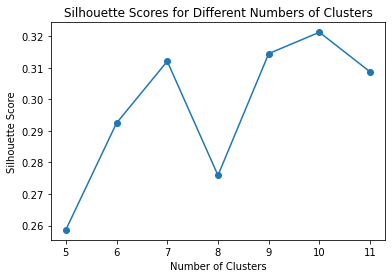

Optimal Number of Clusters: 10


In [653]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import random

# Set a fixed random seed for reproducibility
random_seed = 43
random.seed(random_seed)
np.random.seed(random_seed)

# Define a subset size as without performing this step, the computational time for each data point takes too long.
subset_size = min(10000, len(clustering_df))

# Defining a range of possible cluster numbers
cluster_range = range(5, 12)

# Initializing variables to store silhouette scores
silhouette_scores = []

# Performing hyperparameter search with a larger subset of data
for n_clusters in cluster_range:
    # Randomly sample a larger subset of the data
    subset_indices = random.sample(range(len(clustering_df)), subset_size)
    subset_data = clustering_df.iloc[subset_indices]

    # Initialize KMeans with a fixed random state
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed, init='k-means++')
    
    # Fit KMeans and calculate silhouette score
    subset_data['cluster'] = kmeans.fit_predict(subset_data)
    silhouette_avg = silhouette_score(subset_data, subset_data['cluster'])
    silhouette_scores.append(silhouette_avg)

    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

# Plotting the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

# Find the optimal number of clusters
optimal_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_n_clusters}")

the optimal number of clusters comes out differently when running it and experimenting with different ranges. This might be because the silhouette method is based on the assumption that the data is well-separated into distinct clusters. However, in reality, data sets often have varying degrees of clusterability, and the optimal number of clusters may not be clear-cut. So the decision to take 10 as the optimal number of clusters was taken after multiple code runs and choosing the most frequent answer for silhuoette score.

#### 5. Performing K-Means Clustering using the optimal number of clusters obtained from the silhouette score

In [655]:
# taking the optimal number of clusters
n_clusters = 10
# Set a fixed random seed for reproducibility
random_seed = 43
random.seed(random_seed)
np.random.seed(random_seed)

kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed, init='k-means++')

# Fitting KMeans on the dataset
clustering_df['cluster'] = kmeans.fit_predict(clustering_df)

# Assigning clusters to other dataframes for future works
movie_reviews_encoded['cluster'] = kmeans.predict(clustering_df)  
movie_reviews['cluster'] = kmeans.predict(clustering_df) 

# Displaying the resulting clusters with its counts
cluster_counts = clustering_df['cluster'].value_counts().sort_index()
print(cluster_counts)

0    2371
1    1660
2    1687
3    1586
4     837
5    1345
6    1484
7    1841
8    1142
9    2366
Name: cluster, dtype: int64


This shows the number of cluster following with the number of movies in that cluster. Everytime the code is run, it shows 
different results as the clustering is performed on the basis of various features.

In [656]:
# checking if my dataframe has the number of cluster assigned to each row
clustering_df.head()

,runtime_bucketized,tomatometer_rating,audience_rating,tomatometer_status,audience_status,rating_discrepancy,Action & Adventure,Animation,Anime & Manga,Art House & International,...,Special Interest,Sports & Fitness,Television,Western,Rated_NC17,Rated_NR,Rated_PG,Rated_PG-13,Rated_R,cluster
0,0.50,0.49,0.53,0.0,0.0,0.502762,1,0,0,0,...,0,0,0,0,0,0,1,0,0,5
149,0.25,0.87,0.64,1.0,1.0,0.651934,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9
291,0.75,0.67,0.53,0.5,0.0,0.602210,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
315,0.50,1.00,0.97,1.0,1.0,0.541436,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
369,0.75,0.89,0.74,0.5,1.0,0.607735,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4


Not able to reproduce exactly the same clustering results every time, even when using a fixed random seed. The reason might be that the KMeans algorithm involves an element of randomness during the initialization phase. The algorithm starts by randomly initializing cluster centers, and the final results can be sensitive to these initializations. Also, the clustering is done based on several features and not just one, so even after setting random seed, I am getting different clusters.

#### 6. Analyze the characteristics of movies in different clusters

In [657]:
# viewing the means of the columns to see more details about the clusters
cluster_means = clustering_df.groupby('cluster').mean()
cluster_means

,runtime_bucketized,tomatometer_rating,audience_rating,tomatometer_status,audience_status,rating_discrepancy,Action & Adventure,Animation,Anime & Manga,Art House & International,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,Rated_NC17,Rated_NR,Rated_PG,Rated_PG-13,Rated_R
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.494833,0.807921,0.760772,0.525095,1.000000,0.550911,0.140025,0.016449,0.002531,0.270772,...,0.075917,0.016449,0.005061,0.018979,0.032476,0.006326,0.911430,0.000000,0.000000,0.000000
1,0.423193,0.543440,0.407735,0.266265,0.003614,0.599837,0.136747,0.009639,0.000602,0.199398,...,0.104217,0.016867,0.002410,0.015663,0.013855,0.003614,0.988554,0.000000,0.000000,0.000000
2,0.376852,0.833954,0.746017,0.583877,0.874926,0.573446,0.009484,0.005335,0.000000,0.072910,...,0.004742,0.530528,0.050978,0.053942,0.000593,0.000593,0.707765,0.086544,0.081209,0.083580
3,0.451293,0.409048,0.452062,0.122636,0.121059,0.501097,0.065574,0.005675,0.000000,0.097100,...,0.037831,0.019546,0.001261,0.005675,0.009458,0.000000,0.000000,0.000000,0.000000,0.994956
4,0.396356,0.518196,0.569976,0.305257,0.445639,0.496254,0.408602,0.468339,0.004779,0.043011,...,0.336918,0.014337,0.000000,0.033453,0.005974,0.000000,0.034648,0.600956,0.009558,0.000000
5,0.511338,0.618201,0.648788,0.378067,0.642379,0.507963,0.246840,0.023792,0.000000,0.113011,...,0.146468,0.015613,0.021561,0.012639,0.033457,0.000000,0.000000,0.997026,0.000000,0.000000
6,0.545654,0.519292,0.607001,0.326146,0.547844,0.476404,0.389488,0.028976,0.002695,0.083558,...,0.237197,0.010782,0.004717,0.007412,0.018868,0.000674,0.000000,0.000000,0.985849,0.000000
7,0.453558,0.389419,0.402194,0.120587,0.066268,0.517803,0.368278,0.004345,0.000000,0.081477,...,0.130364,0.008691,0.000000,0.004889,0.017382,0.001086,0.000000,0.005432,0.000000,0.985334
8,0.464974,0.441226,0.555184,0.227671,0.429072,0.461902,0.149737,0.010508,0.000000,0.076182,...,0.076182,0.012259,0.007005,0.000876,0.006130,0.003503,0.000000,0.000000,0.983363,0.000000


The above table can be very insightful in knowing type of movies that each cluster possesses by looking at the mean of the differenct characteristics in that cluster

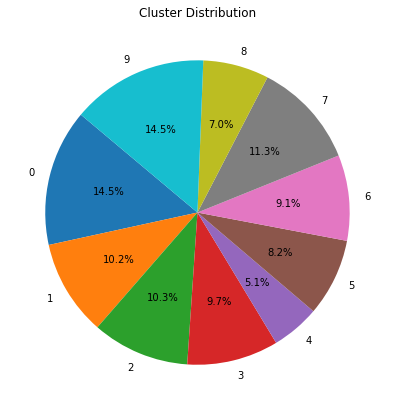

In [705]:
# Viewing the distibution of movies in the clusters
# Plotting a pie chart
plt.figure(figsize=(7,7))
colors = plt.cm.tab10.colors
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors = colors )
plt.title('Cluster Distribution')
plt.show()

the distribution of the number of movies in each cluster is imbalanced.

Text(0.5, 1.0, 'Distribution of Tomatometer Ratings Across Clusters')

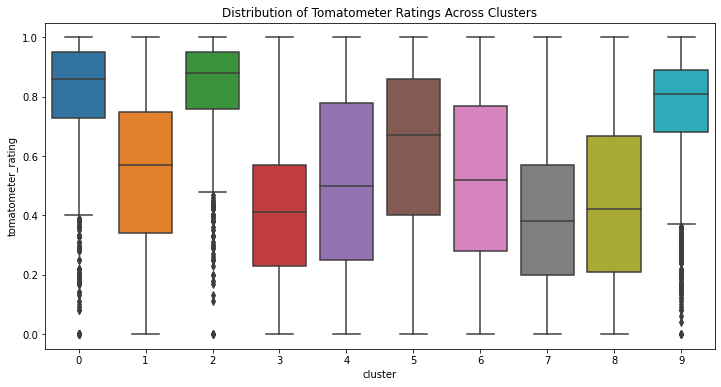

In [659]:
# Creating a boxplot showing the distribution of critics' rating in different clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='tomatometer_rating', data=clustering_df)
plt.title('Distribution of Tomatometer Ratings Across Clusters')

Text(0.5, 1.0, 'Distribution of Audience Ratings Across Clusters')

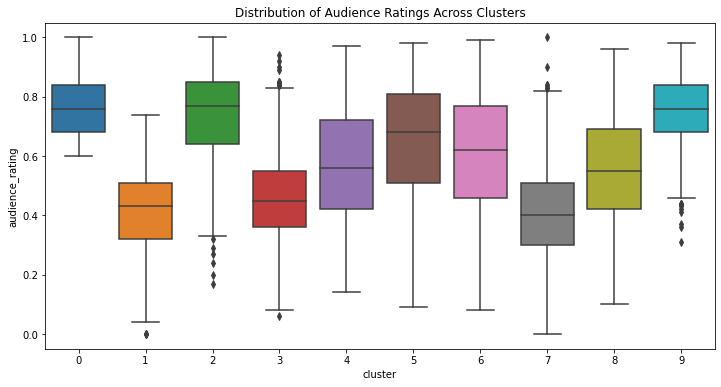

In [660]:
# Creating a boxplot showing the distribution of audience rating in different clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='audience_rating', data=clustering_df)
plt.title('Distribution of Audience Ratings Across Clusters')

By using box plots for different columns, we can see the distribution of feature values within each cluster.

In [661]:
# extracting the cluster centers from a KMeans clustering model.
cluster_centers = kmeans.cluster_centers_[:, :32]
cluster_centers

array([[ 4.94833404e-01,  8.07920709e-01,  7.60771826e-01,
         5.25094897e-01,  1.00000000e+00,  5.50910985e-01,
         1.40025306e-01,  1.64487558e-02,  2.53057782e-03,
         2.70771826e-01,  3.34879798e-01,  3.08730493e-01,
         4.63939266e-03,  8.85702235e-03,  7.25854070e-01,
         4.21762969e-03,  5.06115563e-03,  7.50738085e-02,
         2.78363560e-02,  7.21214677e-02,  1.61956980e-01,
         1.57739350e-01,  7.59173345e-02,  1.64487558e-02,
         5.06115563e-03,  1.89793336e-02,  3.24757486e-02,
         6.32644454e-03,  9.11429776e-01, -8.18789481e-16,
         3.33066907e-16, -1.55431223e-15],
       [ 4.23192771e-01,  5.43439759e-01,  4.07734940e-01,
         2.66265060e-01,  3.61445783e-03,  5.99836917e-01,
         1.36746988e-01,  9.63855422e-03,  6.02409639e-04,
         1.99397590e-01,  1.09036145e-01,  2.75903614e-01,
         1.80722892e-03,  2.95180723e-02,  5.45783133e-01,
         2.40963855e-03,  1.32530120e-02,  2.30722892e-01,
         9.63

- making the distribution graphs for each cluster

In [662]:
feature_names = ['runtime_bucketized', 'tomatometer_rating', 'audience_rating',
                'tomatometer_status', 'audience_status','rating_discrepancy',
                 'Action & Adventure', 'Animation', 'Anime & Manga',
                 'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
                 'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
                 'Horror', 'Kids & Family', 'Musical & Performing Arts',
                 'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
                 'Special Interest', 'Sports & Fitness', 'Television', 'Western',
                 'Rated_NC17', 'Rated_NR', 'Rated_PG', 'Rated_PG-13', 'Rated_R'] 

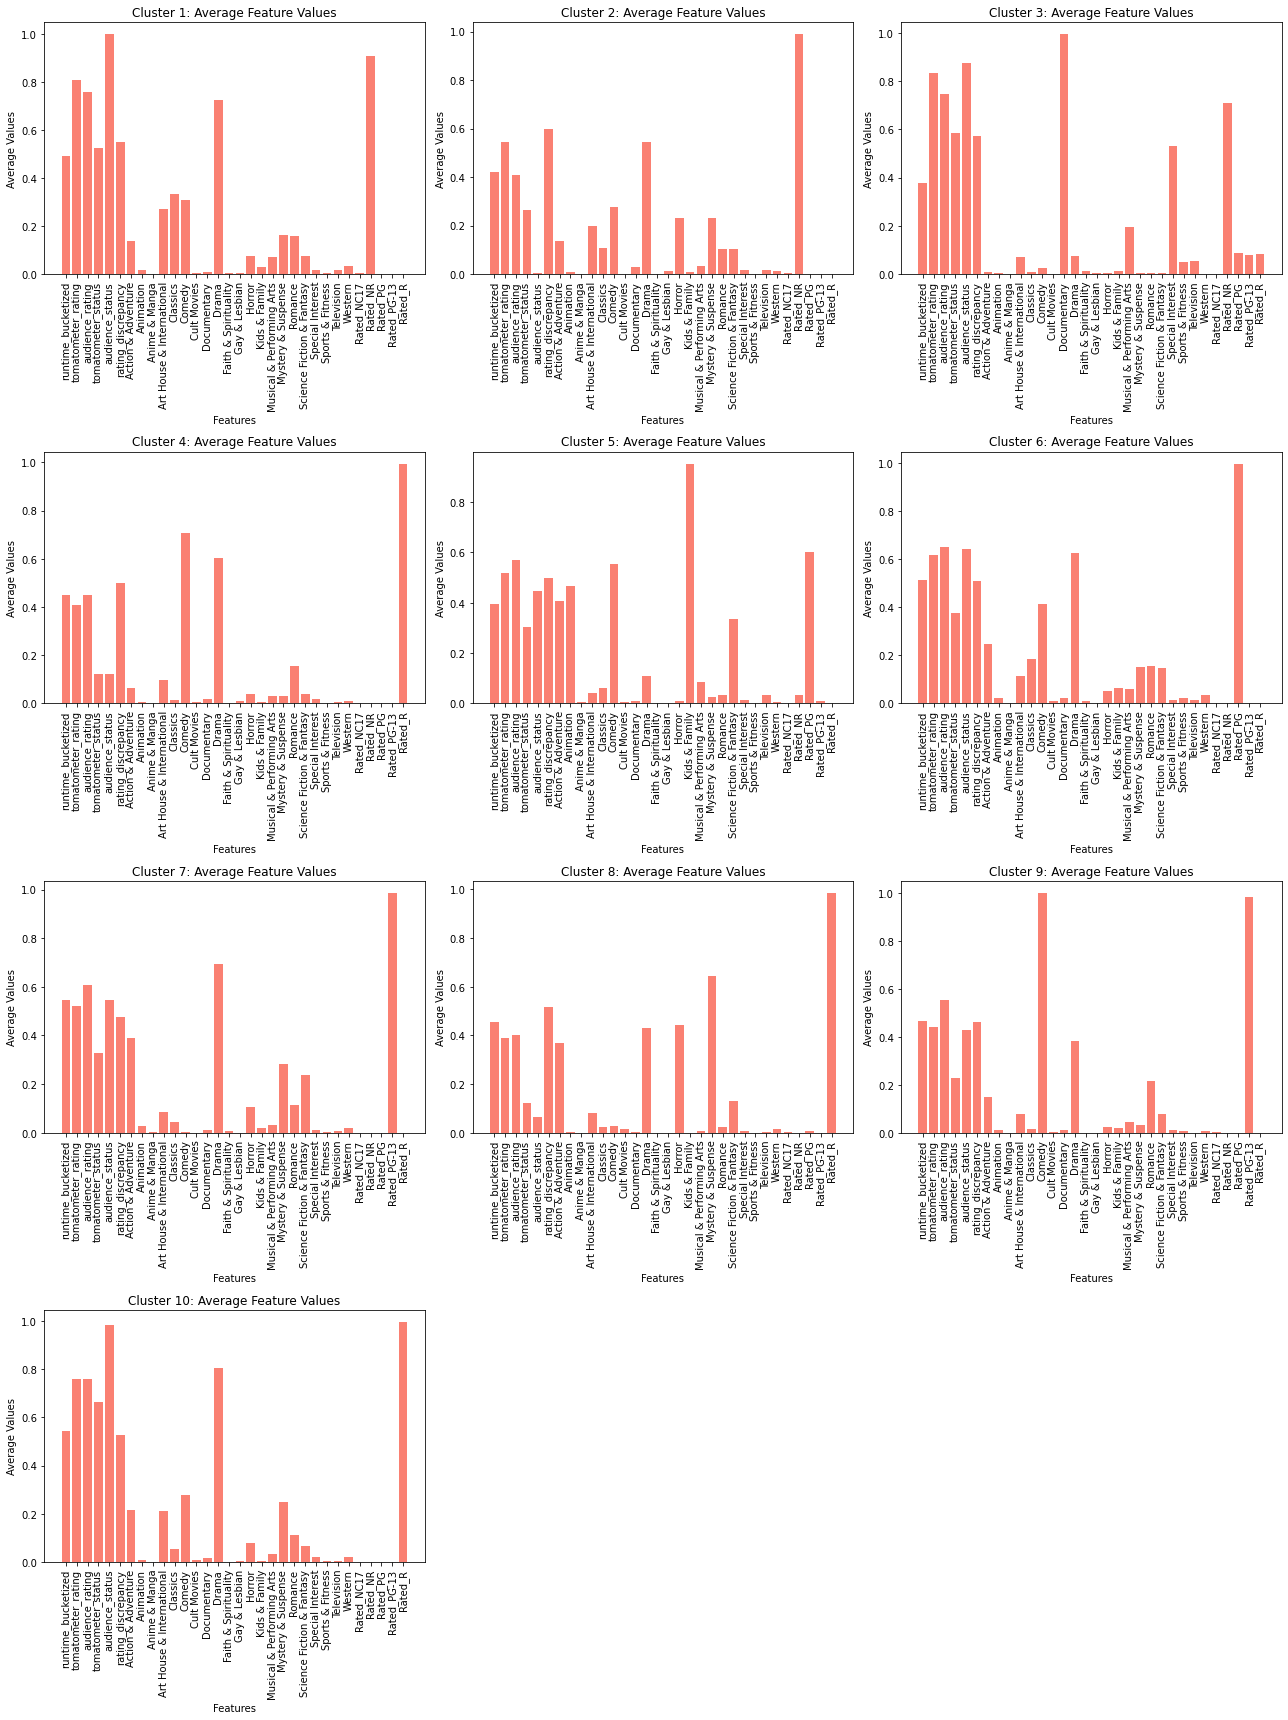

In [663]:
m_clusters = len(cluster_centers)

# Create subplots with 3 columns
fig, axs = plt.subplots((m_clusters + 2) // 3, 3, figsize=(18, 6 * ((m_clusters + 2) // 3)))
axs = axs.flatten()

# Plotting average feature values for each cluster
for cluster_id in range(m_clusters):
    cluster_center_values = cluster_centers[cluster_id]
    axs[cluster_id].bar(feature_names, cluster_center_values, color='salmon')
    axs[cluster_id].set_xlabel('Features')
    axs[cluster_id].set_ylabel('Average Values')
    axs[cluster_id].set_title(f'Cluster {cluster_id + 1}: Average Feature Values')
    axs[cluster_id].tick_params(axis='x', rotation=90)
    
for i in range(m_clusters, len(axs)):
    axs[i].axis('off')
plt.tight_layout()
plt.show()

This shows the mean values of all the movie features present in the 10 clusters and hence provides us basic information about the type of movies that each cluster consists. 

For example, if we compare two clusters numbered 7 and 10, both the clusters contain most movies of the genre 'Drama' along with other minority genres, but, cluster 7 contains most movies assigned the content rating of 'PG-13' while 10 consistes of majority of movies having content rating of 'R'. Cluster 7 has, on average lower critic as well as audience rated movies as compared to those in cluster 10. Thus, different clusters are formed having a different variety of features.

- Looking at the distribution in the clusters much more efficiently using **Radar Chart**

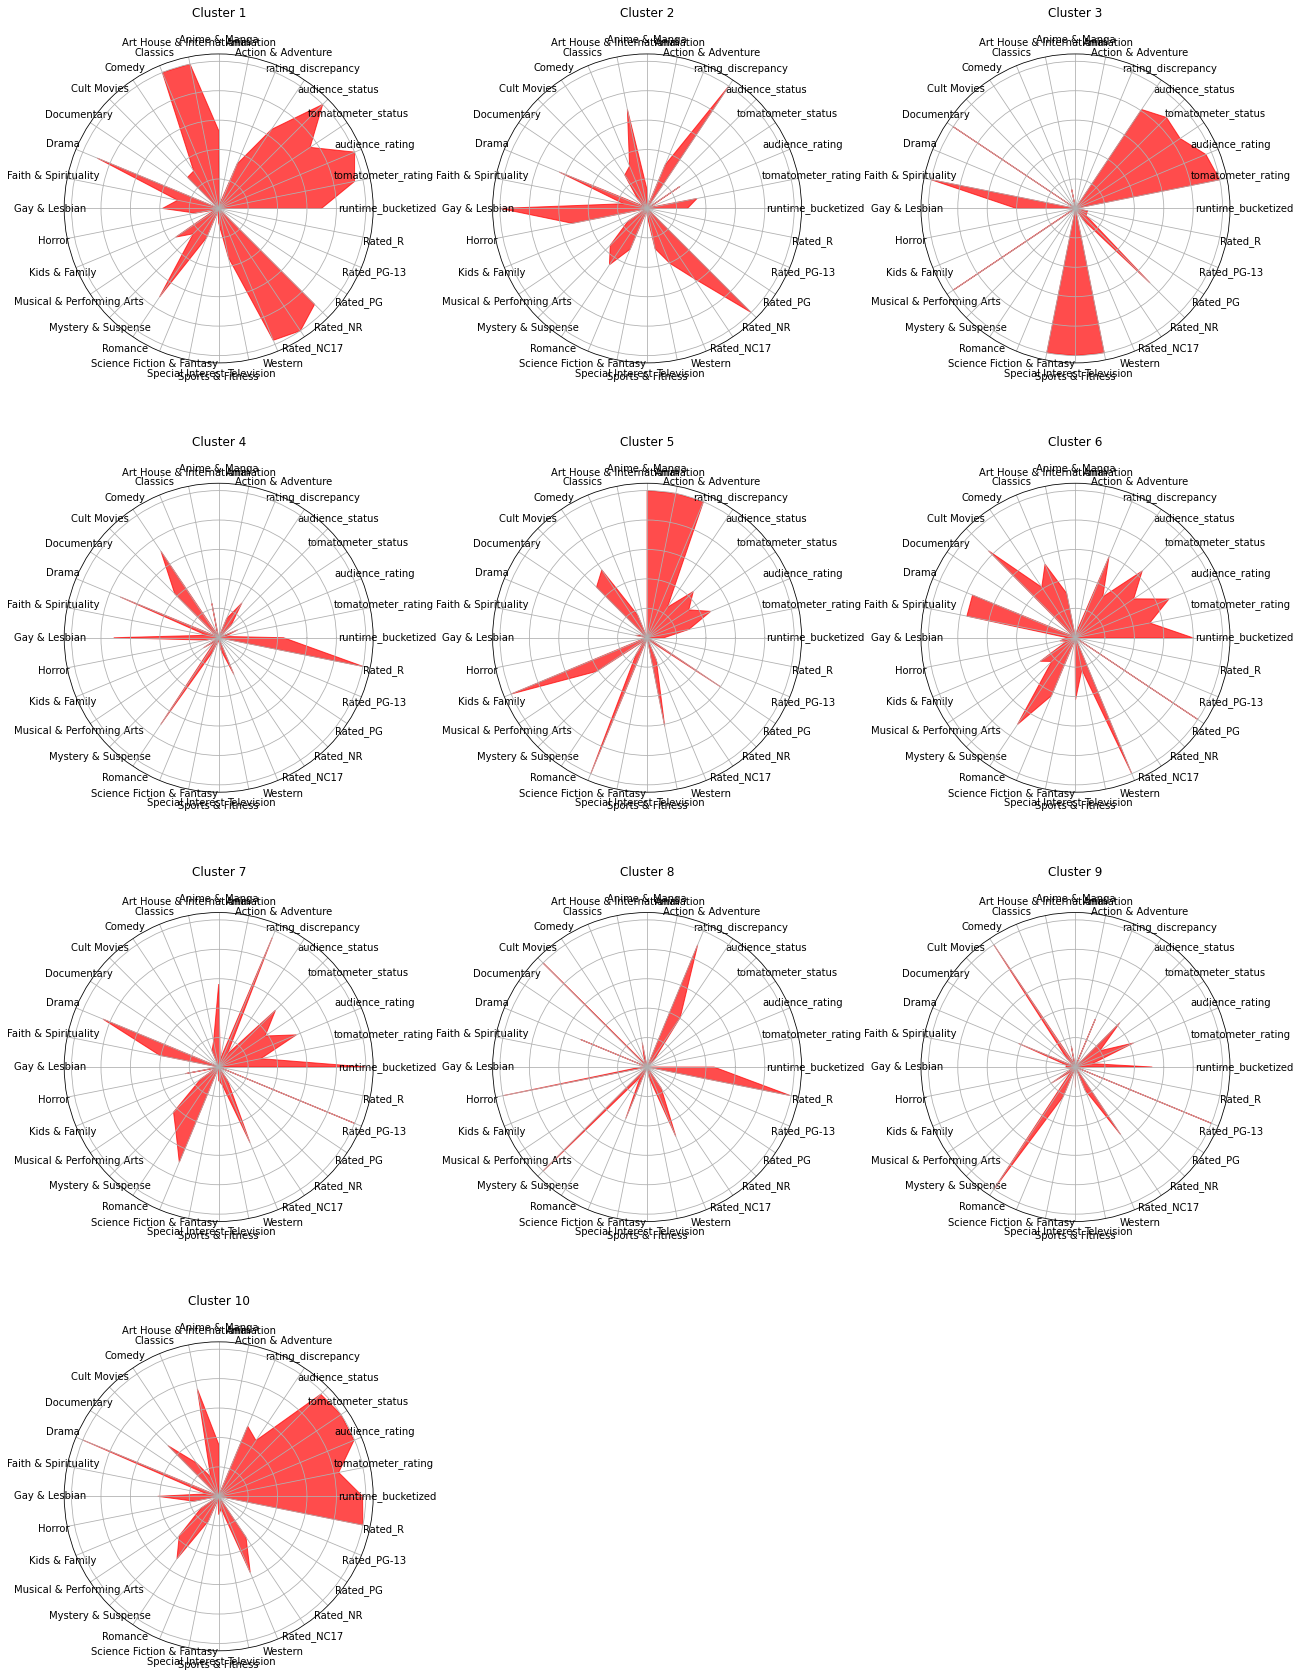

In [664]:
# Normalize the data for radar chart
normalized_centers = (cluster_centers - np.min(cluster_centers, axis=0)) / (np.max(cluster_centers, axis=0)\
                                                                            - np.min(cluster_centers, axis=0))

# Create subplots with 3 columns
fig, axs = plt.subplots((m_clusters + 2) // 3, 3, figsize=(18, 6 * ((m_clusters + 2) // 3)), subplot_kw=dict(polar=True))
axs = axs.flatten()

# Plotting radar chart for each cluster
for cluster_id in range(m_clusters):
    cluster_values = normalized_centers[cluster_id]
    angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False)
    values = np.concatenate((cluster_values, [cluster_values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    axs[cluster_id].fill(angles, values, color='red', alpha=0.7)
    axs[cluster_id].set_xticks(angles[:-1])
    axs[cluster_id].set_xticklabels(feature_names)
    axs[cluster_id].set_yticklabels([])
    axs[cluster_id].set_title(f'Cluster {cluster_id + 1}', y=1.1)

for i in range(m_clusters, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

The radar plots are very efficient in looking at the features and their densities in each cluster in one glance.

For example, cluster 3 contains most movies having the genre assignments of 'Documentary','Faith & Spirituality','Musical & Performing Arts','Special Interest','Sports & Fitness' and 'Television'. Almost all of the movies in this cluster have high ratings from audience as well as critics. Most movies in this cluster have content rating assigned as 'NR'.

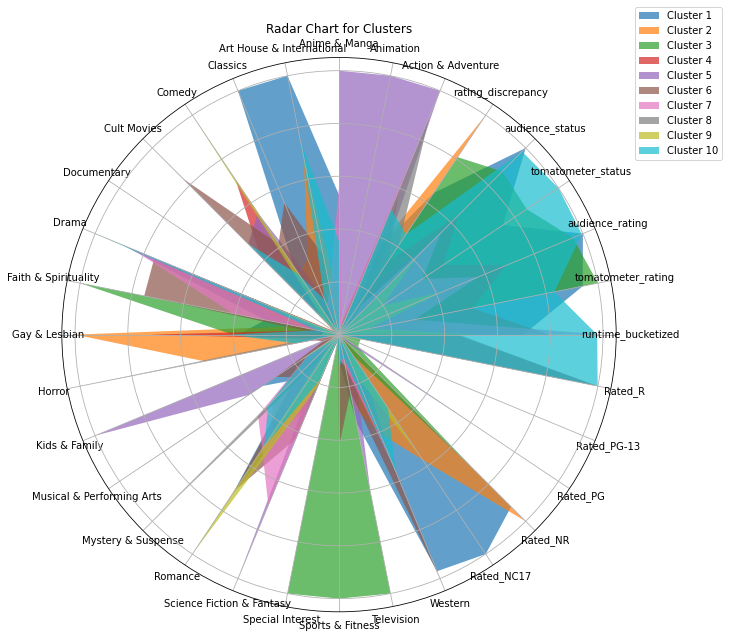

In [703]:
# Create a single radar chart with different colors for each cluster
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plotting radar chart for each cluster
for cluster_id in range(m_clusters):
    cluster_values = normalized_centers[cluster_id]
    angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False)
    values = np.concatenate((cluster_values, [cluster_values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    ax.fill(angles, values, alpha=0.7, label=f'Cluster {cluster_id + 1}')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_names)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.set_title('Radar Chart for Clusters')

plt.tight_layout()
plt.show()

This plot is just to compare different clusters in one graph

-----------------------------------------------------------------------------------------------------------------------------

### Q3. Creating a basic model for recommendation of movies from the clusters based on certain features in our dataset

#### 1. Basic model for recommending movies on the basis of 'genres'.

In [701]:
def get_genre_recommendations(input_genre, clustering_df, movie_reviews_encoded):
    # Find the cluster having the maximum number of movies assigned the given genre 
    genre_counts = movie_reviews_encoded.groupby(['cluster', 'genres']).size().reset_index(name='count')
    # +1 is because the cluster numbers are assigned from 0 and not 1 as we have done it in the above
    # histograms and radar charts
    max_genre_cluster = genre_counts.loc[genre_counts.groupby('genres')['count'].idxmax(), 'cluster']
    max_genre_cluster = max_genre_cluster[genre_counts['genres'] == input_genre].values[0]+1

    # Filter movies in the same cluster (excluding the input genre)
    cluster_movies_genre = movie_reviews_encoded[movie_reviews_encoded['cluster'] == max_genre_cluster]
    cluster_movies_genre = cluster_movies_genre[cluster_movies_genre['genres'] != input_genre]

    # Recommend top movies from the cluster based on tomatometer_rating rating criteria 
    recommended_movies = cluster_movies_genre.sort_values(by='tomatometer_rating', ascending=False).head(10)

    return recommended_movies[['movie_title', 'genres', 'audience_rating', 'tomatometer_rating', 'cluster']]

# Setting an input genre to get similar movie recommendations.
input_genre = 'Drama'
recommendations_on_genre = get_genre_recommendations(input_genre, clustering_df, movie_reviews_encoded)
recommendations_on_genre

,movie_title,genres,audience_rating,tomatometer_rating,cluster
431859,HULK VS.,"Action & Adventure, Animation, Kids & Family",0.67,1.00,6
600333,My Life as a Zucchini (Ma vie de courgette),"Animation, Art House & International, Kids & F...",0.89,0.99,6
34402,Babe,"Action & Adventure, Drama, Kids & Family, Scie...",0.67,0.97,6
163736,Batman Beyond: Return of the Joker,"Action & Adventure, Animation, Kids & Family, ...",0.86,0.91,6
369,"20,000 Leagues Under The Sea","Action & Adventure, Drama, Kids & Family",0.74,0.89,6
374206,Gianni e le donne (The Salt of Life),"Art House & International, Comedy, Drama",0.45,0.84,6
601083,My Side of the Mountain,"Action & Adventure, Art House & International,...",0.56,0.83,6
33008,Black Beauty,"Action & Adventure, Drama, Kids & Family",0.75,0.80,6
492135,Kim,"Action & Adventure, Classics, Drama, Kids & Fa...",0.57,0.78,6
163437,Batman: Assault on Arkham,"Action & Adventure, Animation, Kids & Family, ...",0.85,0.75,6


The model picks out the cluster having most number of the input genre movies and then recommends the movies from that cluster. The recommendations are on the assumption that the viewer wants to see movies similar to the movies having 'Drama' genre and not exactly just that genre. So the recommendation model will recommend movies from the cluster having similar movies but having different types of genres on the basis of the tomatometer_rating.

#### 2. Basic Movies recommendation system based on 'content_rating'

In [694]:
def get_content_rating_recommendations(input_content_rating, clustering_df, movie_reviews):
    # Find the cluster with the most movies of the input content rating
    content_rating_counts = movie_reviews.groupby(['cluster', 'content_rating']).size()\
    .reset_index(name='count')
    # +1 is because the cluster numbers are assigned from 0 and not 1 as we have done it in the above histograms
    # and radar charts
    max_content_rating_cluster = content_rating_counts.loc[content_rating_counts.groupby('content_rating')['count']\
                                                           .idxmax(), 'cluster']
    max_content_rating_cluster = max_content_rating_cluster[content_rating_counts['content_rating']\
                                                            == input_content_rating].values[0]+1

    # Filter movies in the same cluster (excluding the input content rating)
    cluster_movies_content_rating = movie_reviews[movie_reviews['cluster'] == max_content_rating_cluster]
    cluster_movies_content_rating = cluster_movies_content_rating[cluster_movies_content_rating['content_rating']\
                                                                  != input_content_rating]

    # Recommend top movies from the cluster based on tomatometer rating criteria 
    recommended_movies = cluster_movies_content_rating.sort_values(by='tomatometer_rating', ascending=False).head(10)

    return recommended_movies[['movie_title', 'genres', 'audience_rating', 'tomatometer_rating', \
                               'content_rating', 'cluster']]

# Example of giving 'PG-13' as the input for recommendation
input_content_rating = 'PG-13'
recommendations_on_content_rating = get_content_rating_recommendations(input_content_rating, clustering_df, movie_reviews)
recommendations_on_content_rating

,movie_title,genres,audience_rating,tomatometer_rating,content_rating,cluster
827,The Prowler (Cost of Living ),"Drama, Mystery & Suspense",86.0,100.0,PG,9
924080,The Aggression Scale,"Action & Adventure, Drama, Mystery & Suspense",50.0,100.0,R,9
915541,Temple Grandin,"Drama, Television",94.0,100.0,PG,9
204356,'Breaker' Morant,"Art House & International, Drama",91.0,100.0,PG,9
348379,Five Graves to Cairo,"Drama, Mystery & Suspense",80.0,100.0,PG,9
22766,Lust for Life,"Classics, Drama",81.0,100.0,PG,9
22972,The Maltese Falcon,"Drama, Mystery & Suspense",91.0,100.0,PG,9
887098,The Strange Love of Martha Ivers,"Classics, Drama, Mystery & Suspense",73.0,100.0,PG,9
691281,Raise Ravens (Cria Cuervos),"Art House & International, Drama, Mystery & Su...",94.0,100.0,PG,9
408268,The Heart Is a Lonely Hunter,"Classics, Drama",85.0,100.0,PG,9


It recommends movies from the cluster that contains majority of movies with the specified input content_rating, excluding those with the same input content_rating. The recommendations are then based on the 'tomatometer_rating' in descending order, giving the top-rated similar movies from that cluster.

- *Note - We can check whether the clusters show the max number of input ratings or genres that we provided and compare the results that we got through these recommendation system with the histogram plots or radar charts created above for each cluster.*

**Q.3 Do clusters formed based on various movie features result in accurate movie recommendations?**
- **ans** - After a careful analysis and exploration of the movie recommendations generated by our genre and content rating-based recommendation systems, it's evident that some suggestions closely align with our input preferences. However, there are instances, such as 'My Life as a Zucchini (Ma vie de courgette)' that is recommended when searching for Drama genre, where the recommendation may not exhibit a strong similarity. Similarly, when providing an input like 'PG-13' for content rating, certain movies within the cluster may not precisely align with the specified content rating but instead share similarities with other 'PG-13' rated movies. Despite the simplicity of our model, it effectively demonstrates the potential of creating recommendation systems based on diverse features, offering valuable insights into movie preferences. The fact that the clusters are imbalanced might also be a reason for not showing very accurate results.